<a href="https://colab.research.google.com/github/SilvaSebastian11/SenalesySistemas/blob/main/Parcial1/Parcial_1_SyS_Sebasti%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parcial 1 Señales y sistemas | Sebastián André Silva Pastrana**

Ejercicios:

**Pregunta 1**

Se tiene un microprocesador de 5 bits con entrada análoga de 3.3 a 5(v). Diseñe el sistema de acondicionamiento y digitalización para la señal:$X(t) = 20sin\left(7t-\frac{\pi}{2}\right)-3cos(5t)+2cos(10t)$. Presente las  simulaciones y gráficas de los procedimientos más representativos en un cuaderno de Python incluyendo al menos dos periodos de la señal estudiada.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
def my_ceropen(x,ymin = -3.3, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = 25
  xmin = -25 # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  b = ymin - m*xmin
  yv = m*x + b
  return yv

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]


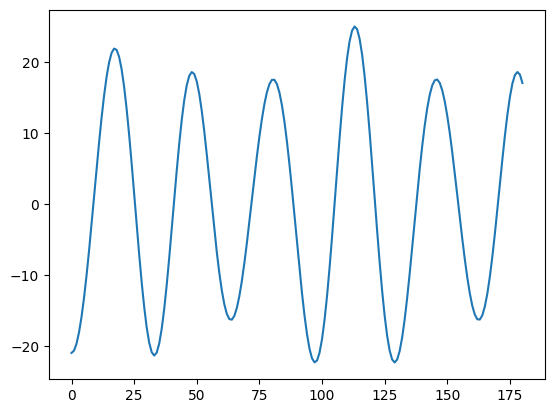

In [ ]:
A1 = 20 # amplitud
A2 = -3
A3 = 2

T_1 = (2/7)*np.pi # Cos 1
T_2 = (2/5)*np.pi # Cos 2
T_3 = (2/10)*np.pi

w1=7
w2=5
w3=10

f1=1/T_1
f2=1/T_2
f3=1/T_3

ti = 0 #tiempo inicial
tf = 4*T_2 #tiempo final
Fs = 36 # Hz
Ts = 1/Fs
tv = np.arange(ti,tf,Ts) #vector de datos en tiempo #discretizar
y = A1*np.sin(w1*tv-np.pi/2)+ A2*np.cos(w2*tv)+ A3*np.cos(w3*tv) #vector de datos en amplitud

#cero y pendiente
ymin = -3.3
ymax = 5
nbits = 5
plt.plot(y,label='y(t)') #continua

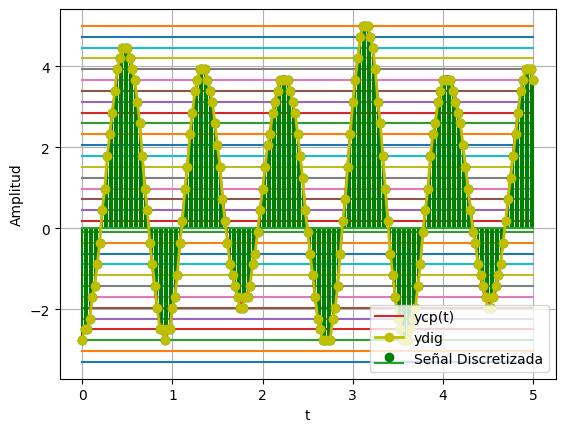

Señal discretizada


In [ ]:
ycs = my_ceropen(y, ymin,ymax)#cero y pendiente
ve = np.linspace(ymin,ymax,2**nbits)

#Acercar al cajon más cercano
for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#Anchar los cajones a lo largo de tv
for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.stem(tv,yq , linefmt="green", markerfmt="go", basefmt="", label="Señal Discretizada")
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()
print("Señal discretizada")

**Pregunta 2**

Cuál es el señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo $5khz$, aplicado a la señal $x(t)= 3cos(11000\pi t)$?.Realizar la simulación del proceso de discretización. en caso de que la simulación del proceso de discretización. en caso de que la dioscretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

Implementando un filtro antialiasing

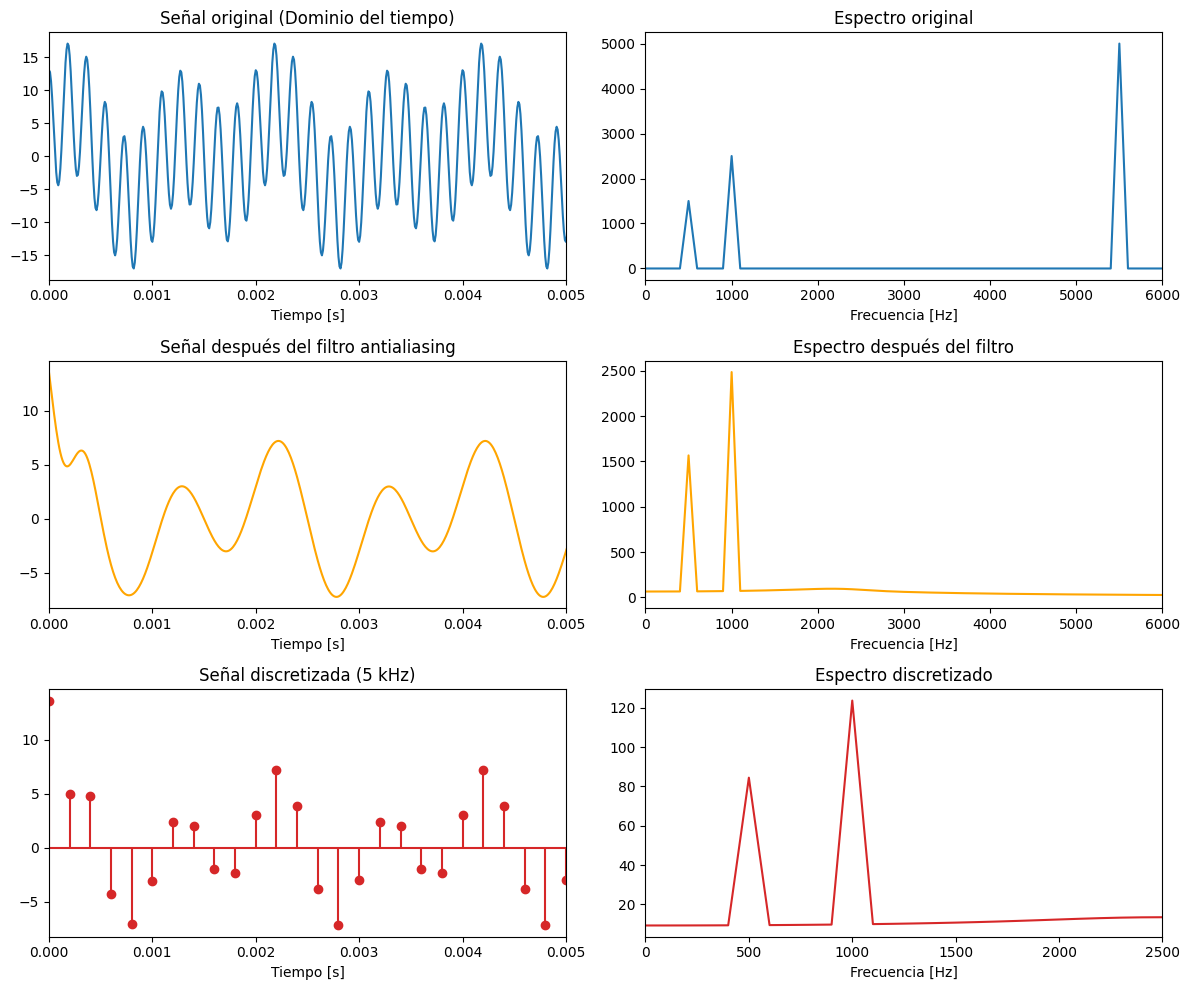


Primeras 10 muestras de la señal discretizada:
[13.6004  4.9941  4.745  -4.2475 -7.0176 -3.0712  2.3571  1.9994 -2.0067
 -2.3295]
Conclusión:
- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).
- Se implementó un filtro antialiasing de 2500 Hz para eliminar frecuencias altas.
- La señal discretizada correctamente contiene solo las componentes de 500 Hz y 1000 Hz.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ------------------------------------------
# 1. Definición de parámetros de la señal
# ------------------------------------------
f1 = 500    # Frecuencia de componente 1 (Hz)
f2 = 1000   # Frecuencia de componente 2 (Hz)
f3 = 5500   # Frecuencia de componente 3 (Hz)
fs_high = 100000  # Frecuencia de muestreo alta para simular señal continua (100 kHz)
t_high = np.arange(0, 0.01, 1/fs_high)  # Tiempo desde 0 a 0.01 s con paso 1/fs_high

# ------------------------------------------
# 2. Generación de la señal compuesta continua
# ------------------------------------------
# Señal compuesta por 3 frecuencias
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) +      # Componente 500 Hz
          5 * np.sin(2 * np.pi * f2 * t_high) +      # Componente 1000 Hz
          10 * np.cos(2 * np.pi * f3 * t_high))      # Componente 5500 Hz

# ------------------------------------------
# 3. Filtro pasa bajas antialiasing (Butterworth)
# ------------------------------------------
nyquist = 0.5 * fs_high              # Frecuencia de Nyquist para el sistema simulado (50 kHz)
cutoff = 2500                        # Frecuencia de corte del filtro (elimino componentes > 2.5 kHz)
order = 6                            # Orden del filtro (mayor orden = respuesta más abrupta)
normal_cutoff = cutoff / nyquist    # Frecuencia normalizada para diseño del filtro

# Diseño del filtro Butterworth
b, a = signal.butter(order, normal_cutoff, btype='low')

# ------------------------------------------
# 4. Aplicación del filtro a la señal
# ------------------------------------------
x_filtered = signal.filtfilt(b, a, x_high)  # Filtro con fase lineal (filtrado en ambas direcciones)

# ------------------------------------------
# 5. Muestreo de la señal filtrada
# ------------------------------------------
fs_low = 5000                     # Frecuencia de muestreo final (5 kHz)
factor = int(fs_high / fs_low)   # Factor de reducción
x_filtered_low = x_filtered[::factor]  # Tomar una muestra cada "factor" puntos
t_low = t_high[::factor]              # Tiempo correspondiente a las muestras

# ------------------------------------------
# 6. Análisis en frecuencia (FFT)
# ------------------------------------------
fft_high = np.fft.rfft(x_high)                         # FFT de la señal original
freqs_high = np.fft.rfftfreq(len(x_high), 1/fs_high)   # Eje de frecuencias para la señal original

fft_filtered = np.fft.rfft(x_filtered_low)             # FFT de la señal muestreada
freqs_low = np.fft.rfftfreq(len(x_filtered_low), 1/fs_low)  # Eje de frecuencias para señal muestreada

# ------------------------------------------
# 7. Gráficas
# ------------------------------------------
plt.figure(figsize=(12, 10))

# 1. Señal original en el dominio del tiempo
plt.subplot(3, 2, 1)
plt.plot(t_high, x_high, label='Original')
plt.title('Señal original (Dominio del tiempo)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)  # Mostrar solo los primeros 5 ms

# 2. FFT de la señal original
plt.subplot(3, 2, 2)
plt.plot(freqs_high, np.abs(fft_high))
plt.title('Espectro original')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# 3. Señal después del filtro en el tiempo
plt.subplot(3, 2, 3)
plt.plot(t_high, x_filtered, 'orange', label='Filtrada')
plt.title('Señal después del filtro antialiasing')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# 4. FFT de la señal filtrada
plt.subplot(3, 2, 4)
plt.plot(freqs_high, np.abs(np.fft.rfft(x_filtered)), color='orange')
plt.title('Espectro después del filtro')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 6000)

# 5. Señal discretizada (muestreada) en el tiempo
plt.subplot(3, 2, 5)
plt.stem(t_low, x_filtered_low, linefmt='C3-', markerfmt='C3o', basefmt='C3-')
plt.title('Señal discretizada (5 kHz)')
plt.xlabel('Tiempo [s]')
plt.xlim(0, 0.005)

# 6. FFT de la señal discretizada
plt.subplot(3, 2, 6)
plt.plot(freqs_low, np.abs(fft_filtered), color='C3')
plt.title('Espectro discretizado')
plt.xlabel('Frecuencia [Hz]')
plt.xlim(0, 2500)

plt.tight_layout()
plt.show()

# ------------------------------------------
# 8. Imprimir muestras y conclusiones
# ------------------------------------------
print("\nPrimeras 10 muestras de la señal discretizada:")
print(np.round(x_filtered_low[:10], 4))  # Redondeo a 4 decimales

print("Conclusión:")
print("- La frecuencia de muestreo de 5 kHz no es adecuada para la componente de 5500 Hz (aparece aliasing a 500 Hz).")
print("- Se implementó un filtro antialiasing de 2500 Hz para eliminar frecuencias altas.")
print("- La señal discretizada correctamente contiene solo las componentes de 500 Hz y 1000 Hz.")

Cambiando la frecuencia de muestro a 11000 Hz

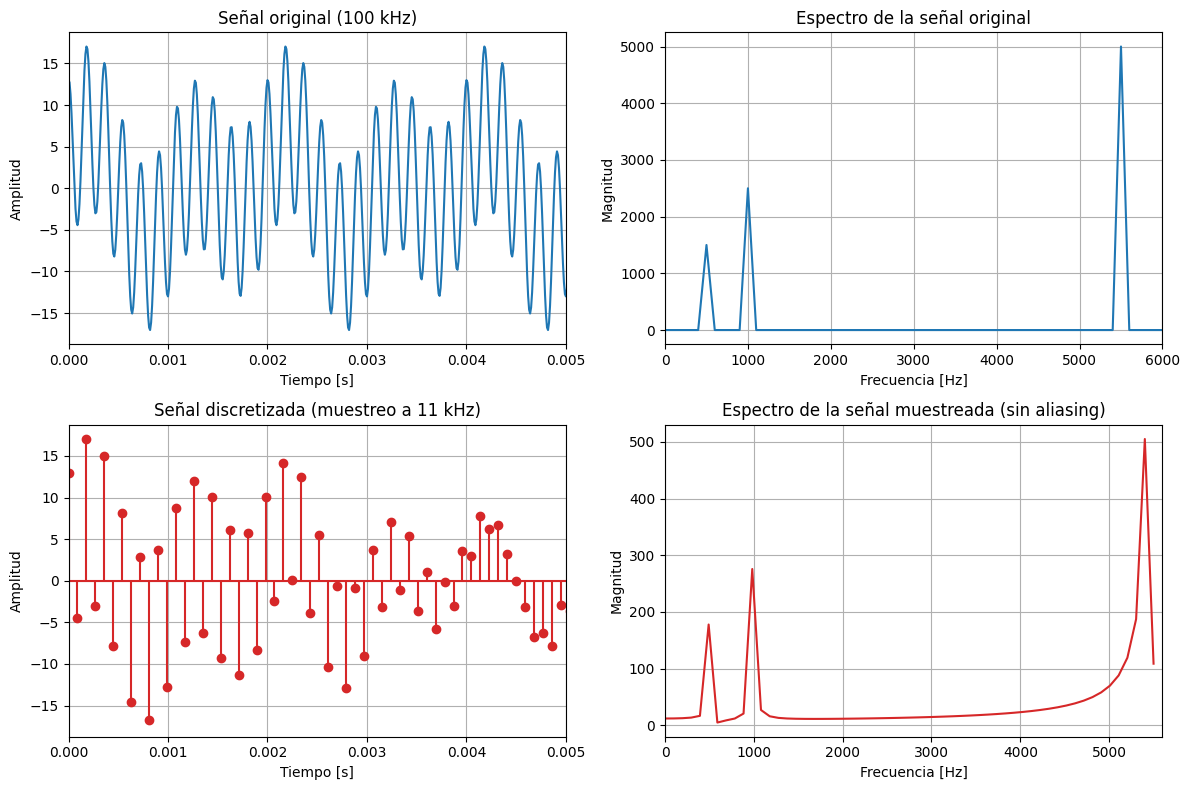


Primeras 10 muestras discretizadas:
[ 13.      -4.4351  17.0374  -3.0111  15.0511  -7.8625   8.2034 -14.5955
   2.8621 -16.7331]

Conclusión:
- La señal original contiene componentes en 500 Hz, 1000 Hz y 5500 Hz.
- Se muestreó la señal directamente a 11,000 Hz, sin aplicar filtro antialiasing.
- Como la frecuencia de muestreo es >= 2 * 5500 Hz (teorema de Nyquist), no se genera aliasing.
- El espectro de la señal muestreada muestra correctamente las tres frecuencias originales.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------
# 1. Definición de parámetros de la señal
# ------------------------------------------
f1 = 500     # Frecuencia componente 1 (Hz)
f2 = 1000    # Frecuencia componente 2 (Hz)
f3 = 5500    # Frecuencia componente 3 (Hz)

fs_high = 100000   # Frecuencia de muestreo alta para simular señal continua (100 kHz)
t_high = np.arange(0, 0.01, 1/fs_high)  # Vector de tiempo desde 0 hasta 0.01 s

# ------------------------------------------
# 2. Generación de la señal continua
# ------------------------------------------
# Se combinan tres componentes sinusoidales
x_high = (3 * np.cos(2 * np.pi * f1 * t_high) +     # 500 Hz
          5 * np.sin(2 * np.pi * f2 * t_high) +     # 1000 Hz
          10 * np.cos(2 * np.pi * f3 * t_high))     # 5500 Hz

# Esta señal representa la versión "continua" simulada con alta resolución temporal

# ------------------------------------------
# 3. Proceso de discretización (muestreo)
# ------------------------------------------
fs_sample = 11000  # Frecuencia de muestreo deseada (11 kHz)
factor = int(fs_high / fs_sample)  # Factor de reducción para obtener muestras

x_sampled = x_high[::factor]  # Tomamos 1 de cada 'factor' muestras
t_sampled = t_high[::factor]  # Vector de tiempo correspondiente a muestras

# ------------------------------------------
# 4. Transformadas de Fourier (análisis espectral)
# ------------------------------------------
# FFT de la señal original (alta resolución)
fft_original = np.fft.rfft(x_high)
freqs_original = np.fft.rfftfreq(len(x_high), 1/fs_high)

# FFT de la señal muestreada (discreta)
fft_sampled = np.fft.rfft(x_sampled)
freqs_sampled = np.fft.rfftfreq(len(x_sampled), 1/fs_sample)

# ------------------------------------------
# 5. Visualización del proceso de discretización
# ------------------------------------------
plt.figure(figsize=(12, 8))

# Señal original en el tiempo (continua)
plt.subplot(2, 2, 1)
plt.plot(t_high, x_high, label='Original')
plt.title('Señal original (100 kHz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.005)
plt.grid(True)

# Espectro de la señal original
plt.subplot(2, 2, 2)
plt.plot(freqs_original, np.abs(fft_original))
plt.title('Espectro de la señal original')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 6000)
plt.grid(True)

# Señal muestreada en el tiempo
plt.subplot(2, 2, 3)
plt.stem(t_sampled, x_sampled, linefmt='C3-', markerfmt='C3o', basefmt='C3-')
plt.title('Señal discretizada (muestreo a 11 kHz)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0, 0.005)
plt.grid(True)

# Espectro de la señal muestreada
plt.subplot(2, 2, 4)
plt.plot(freqs_sampled, np.abs(fft_sampled), color='C3')
plt.title('Espectro de la señal muestreada (sin aliasing)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Magnitud')
plt.xlim(0, 5600)
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------------------
# 6. Resultados y observaciones
# ------------------------------------------
print("\nPrimeras 10 muestras discretizadas:")
print(np.round(x_sampled[:10], 4))  # Redondeo a 4 decimales

print("\nConclusión:")
print("- La señal original contiene componentes en 500 Hz, 1000 Hz y 5500 Hz.")
print("- Se muestreó la señal directamente a 11,000 Hz, sin aplicar filtro antialiasing.")
print("- Como la frecuencia de muestreo es >= 2 * 5500 Hz (teorema de Nyquist), no se genera aliasing.")
print("- El espectro de la señal muestreada muestra correctamente las tres frecuencias originales.")


**Pregunta 3**

La distancia media entre dos señales $X_1(t), X_2(t) ∈ \mathbb{R} , \mathbb{C}$, se puede expresar a partir de la potencia media:

$d(x_1,x_2)= \overline{P}_\left(x_1-x_2\right)= \lim\limits_{T \to ∞} \frac{1}{T} \int_{T}|x_1(t)-x_2(t)|^2dt$

$x_1(t)=A\text{cos}\left(ω_0t\right), ω_0=\frac{2π}{T}, T, A ∈ \mathbb{R}^+$



In [ ]:
import sympy as sp  # Importamos SymPy para trabajar con álgebra simbólica

# ----------------------------------------------------
# 1. Definición de variables simbólicas
# ----------------------------------------------------
A, t, T = sp.symbols('A t T', real=True, positive=True)  # A: Amplitud, t: tiempo, T: periodo
w0 = 2 * sp.pi / T  # Frecuencia angular fundamental (omega_0 = 2π / T)

# ----------------------------------------------------
# 2. Definición de las señales periódicas
# ----------------------------------------------------

# Señal x1: señal cosenoidal de frecuencia fundamental w0
x1 = A*sp.cos(w0 * t)

# Señal x2: señal por tramos tipo onda cuadrada, definida en un periodo [0, T)
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),             # Primer cuarto del periodo: valor 1
    (-1, (t >= T/4) & (t < 3*T/4)),        # Mitad central del periodo: valor -1
    (1, (t >= 3*T/4) & (t < T))            # Último cuarto del periodo: valor 1
)

# ----------------------------------------------------
# 3. Diferencia cuadrática entre las señales
# ----------------------------------------------------
# Definimos la función a integrar: el error cuadrático (x1 - x2)^2
f = (x1 - x2)**2

# ----------------------------------------------------
# 4. Cálculo de la integral por tramos
# ----------------------------------------------------
# Se integran los tres tramos de la función definida por partes
integral = (
    sp.integrate(f, (t, 0, T/4)) +           # Primer tramo
    sp.integrate(f, (t, T/4, 3*T/4)) +       # Segundo tramo
    sp.integrate(f, (t, 3*T/4, T))           # Tercer tramo
)

# ----------------------------------------------------
# 5. Cálculo de la distancia media cuadrática
# ----------------------------------------------------
# Promedio sobre el periodo
distancia_media = integral / T

# ----------------------------------------------------
# 6. Simplificación del resultado final
# ----------------------------------------------------
distancia_media_simplificada = sp.simplify(distancia_media)

# ----------------------------------------------------
# 7. Mostrar resultado final
# ----------------------------------------------------
print("Distancia media cuadrática entre x1(t) y x2(t):")
display(distancia_media_simplificada)

Distancia media cuadrática entre x1(t) y x2(t):


A**2/2 - 4*A/pi + 1

**Conclusión:** La distancia media cuadrática (MSE) calculada entre la señal cosenoidal $𝑥_1(𝑡)$ y la señal por tramos $𝑥_2(𝑡)$
  representa una medida del error promedio de energía entre ambas señales a lo largo de un periodo.

**Pregunta 4**

Sea $x''(t)$ la segunda derivada de la señal $x(t)$, donde $t$ ∈ [$t_i,t_f$]. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$c_n=\frac{1}{(t_i-t_f)n^2ω_0^2}\int_{t_i}^{t_f}x''(t)e^{-jnω_0t}dt; n ∈ \mathbb{Z}$$

¿Cómo se pueden calcular los coeficientes $a_n$ y $b_n$ desde $x''(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n∈{0, ±1, ±2, ±3, ±4, ±5}$, a partir de $x''(t)$ para la señal en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.

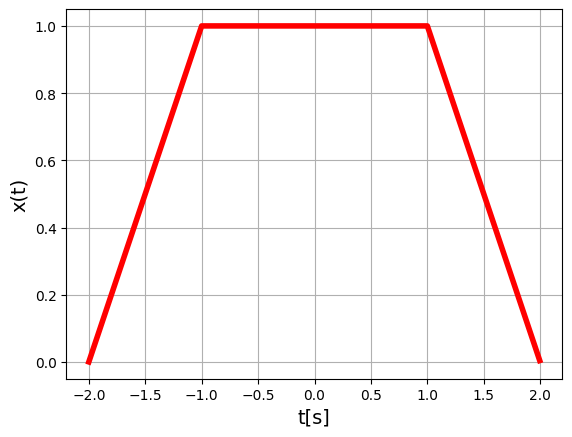

In [ ]:
from ipywidgets import interact, IntSlider  # Se importa 'interact' para crear interfaces interactivas (aunque en este fragmento no se utiliza aún)

# Parámetros del trapecio
A = 1     # Amplitud máxima (aunque no se usa directamente en esta implementación)
d2 = 2    # Límite derecho del trapecio
d1 = 1    # Límite izquierdo del segmento plano del trapecio

# Definición de la duración de la señal
T = 2 * d2              # Periodo total para graficar (de -d2 a d2)
Fo = 1 / T              # Frecuencia fundamental
Fs = 1000 * Fo          # Frecuencia de muestreo (1000 muestras por ciclo, muy alta resolución)
tv = np.arange(-T/2, T/2, 1/Fs)  # Vector de tiempo desde -T/2 hasta T/2 con pasos de 1/Fs
Nm = len(tv)            # Número total de muestras

# Función trapezoidal por definición matemática
def funcion_trapecio(x, a, b, c, d):
    """
    Genera una función en forma de trapecio.

    Parámetros:
    - x: Vector de tiempo (puntos donde evaluar la función).
    - a: Comienzo de la pendiente ascendente del trapecio.
    - b: Comienzo del tramo plano (parte superior).
    - c: Fin del tramo plano.
    - d: Fin de la pendiente descendente.

    Retorna:
    - Un array con valores que representan una función trapezoidal en el dominio de x.
    """
    # Devuelve la forma trapezoidal evaluando máximos y mínimos para cada tramo
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Se genera la señal trapezoidal en el dominio del tiempo
x = funcion_trapecio(tv, -d2, -d1, d1, d2)

# Gráfico de la señal generada
plt.plot(tv, x, 'r', linewidth=4)   # Línea roja gruesa
plt.grid()                          # Mostrar cuadrícula
plt.xlabel("t[s]", fontsize=14)     # Etiqueta del eje x
plt.ylabel("x(t)", fontsize=14)     # Etiqueta del eje y
plt.show()                          # Mostrar la gráfica

In [ ]:
N = 5  # Número de armónicos considerados en la expansión de Fourier (del -N al +N)

wo = 2 * np.pi / T  # Frecuencia fundamental de la señal periódica, calculada a partir del período T

# Crear una matriz para almacenar las funciones base de Fourier complejas (exponenciales)
# Dimensiones: filas = cantidad de muestras, columnas = 2N+1 bases (de -N a N)
phin = np.zeros((Nm, 2 * N + 1), np.complex128)

# Llenar la matriz 'phin' con las exponenciales complejas e^(j*n*wo*t) para cada n de -N a N
for n in range(-N, N + 1, 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)
    # n+N se usa para mapear el índice negativo a uno válido en la matriz (por ejemplo, -5 a índice 0)

# Vector para almacenar los coeficientes de Fourier cₙ
cn = np.zeros(2 * N + 1, np.complex128)

# Vector de los índices armónicos n = [-N, ..., 0, ..., N]
nv = np.linspace(-N, N, 2 * N + 1)

# Fórmula analítica de los coeficientes Cn para la señal trapezoidal o por partes
# Esta fórmula es específica para una señal definida en trozos (como un trapecio o una señal tipo pulso)
Cn = (-2 * (np.cos(nv * np.pi) - np.cos(nv * np.pi * 0.5))) / (np.pi**2 * nv**2)

# Corrección del valor de Cn para n = 0 (nivel DC), ya que la fórmula anterior da una indeterminación (0/0)
Cn[N] = 3 / 4

<ipython-input-9-67bdda5b91f3>:22: RuntimeWarning: invalid value encountered in divide
  Cn = (-2 * (np.cos(nv * np.pi) - np.cos(nv * np.pi * 0.5))) / (np.pi**2 * nv**2)


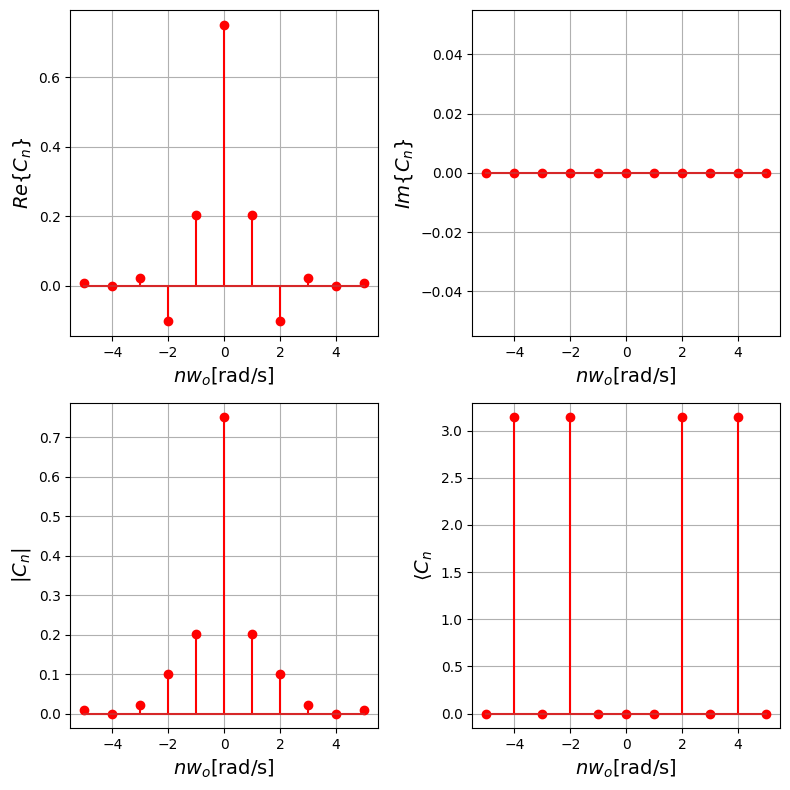

In [ ]:
# Crear una figura con tamaño 8x8 pulgadas para visualizar el espectro de Fourier
fig = plt.figure(figsize=(8,8))

# --------------------------
# Subgráfico 1: Parte real de los coeficientes Cn
# --------------------------
plt.subplot(2,2,1)  # Primer subgráfico (fila 1, columna 1)
plt.stem(nv, np.real(Cn), 'r')  # Dibuja la parte real de Cn como líneas verticales (estilo stem)
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)  # Etiqueta del eje x (frecuencias armónicas)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)    # Etiqueta del eje y (parte real)
plt.axis('tight')  # Ajusta los ejes al contenido
plt.grid()         # Agrega una cuadrícula para mejor lectura

# --------------------------
# Subgráfico 2: Parte imaginaria de los coeficientes Cn
# --------------------------
plt.subplot(2,2,2)  # Segundo subgráfico (fila 1, columna 2)
plt.stem(nv, np.imag(Cn), 'r')  # Parte imaginaria de los coeficientes
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()

# --------------------------
# Subgráfico 3: Magnitud del espectro (|Cn|)
# --------------------------
plt.subplot(2,2,3)  # Tercer subgráfico (fila 2, columna 1)
plt.stem(nv, abs(Cn), 'r')  # Muestra la magnitud (módulo) de cada coeficiente
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid()

# --------------------------
# Subgráfico 4: Fase del espectro (ángulo de Cn)
# --------------------------
plt.subplot(2,2,4)  # Cuarto subgráfico (fila 2, columna 2)
plt.stem(nv, np.angle(Cn), 'r')  # Ángulo o fase de los coeficientes
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)  # Símbolo de fase en LaTeX
plt.axis('tight')
plt.grid()

# Ajusta automáticamente los subgráficos para que no se sobrepongan
fig.tight_layout()

In [ ]:
# Px es la potencia estimada de la señal original (basada en su forma)
Px = 2/3  # Se estimó previamente para la señal trapezoidal

# Función interactiva que permite reconstruir la señal usando 'Na' armónicos a cada lado del espectro
def pltest(Na=1):
    # Crear un rango de índices para los armónicos seleccionados (centrado en n=0)
    ind = np.arange(N - Na, N + Na + 1)

    # Calcular el error de reconstrucción en porcentaje
    er = 1 - np.sum(abs(Cn[ind])**2) / Px
    # Se basa en la comparación de la potencia reconstruida vs. la total

    # Reconstrucción de la señal usando la suma de armónicos seleccionados
    xe = phin[:, ind].dot(Cn[ind])
    # Producto punto entre las bases de Fourier y los coeficientes Cn seleccionados

    # Gráfica de la señal reconstruida (en azul)
    plt.plot(tv, xe, color='b', label='$x_e(t)$')  # señal estimada

    # Gráfica de la señal original (en rojo)
    plt.plot(tv, x, color='r', label='x(t)')  # señal original

    # Mostrar el error porcentual de reconstrucción en el título
    plt.title('$E_r$=%.2f[%%]' % (100 * er), fontsize=16)

    # Etiquetas y leyenda
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return

# Crear un control interactivo con un deslizador para variar la cantidad de armónicos (Na)
interact(pltest, Na=(1, N, 1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>